# Lista 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

### Questões 3 e 4

In [2]:
def young(a):
    return m.exp(-a**2/800)

def old(a):
    return m.exp(-(a-100)**2/1800)

In [3]:
def very_young(a):
    return m.exp(-a**2/400)

def very_old(a):
    return m.exp(-(a-100)**2/900)

In [4]:
def not_very_young(a):
    return 1 - m.exp(-a**2/400)

def not_very_old(a):
    return 1 - m.exp(-(a-100)**2/900)

In [5]:
def new_very_young(a):
    return m.exp(-a**2/800)**2

def new_very_old(a):
    return m.exp(-(a-100)**2/1800)**2

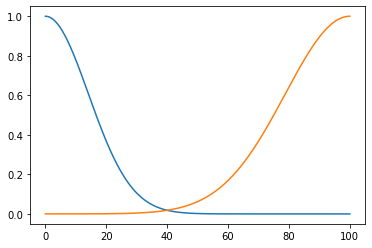

In [6]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(very_young)(x)
y2 = np.vectorize(very_old)(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

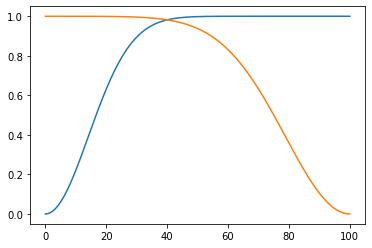

In [7]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(not_very_young)(x)
y2 = np.vectorize(not_very_old)(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

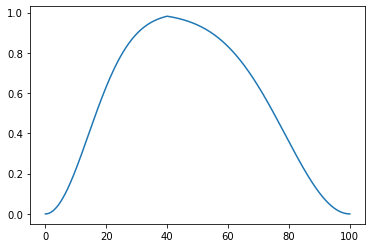

In [8]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(not_very_young)(x)
y2 = np.vectorize(not_very_old)(x)

plt.plot(x, np.minimum(y1, y2))
plt.show()

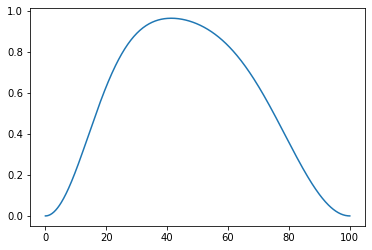

In [9]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(not_very_young)(x)
y2 = np.vectorize(not_very_old)(x)

plt.plot(x, y1*y2)
plt.show()

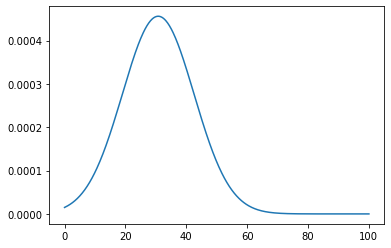

In [10]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(very_young)(x)
y2 = np.vectorize(very_old)(x)

plt.plot(x, y1*y2)
plt.show()

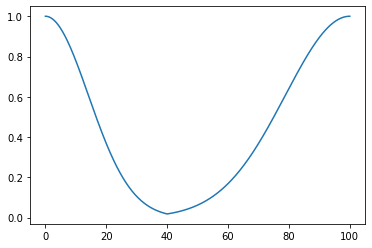

In [11]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(very_young)(x)
y2 = np.vectorize(very_old)(x)

plt.plot(x, np.maximum(y1, y2))
plt.show()

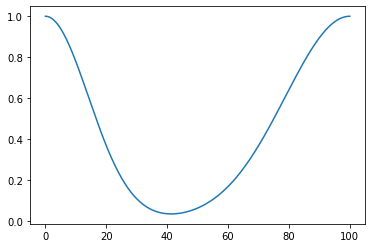

In [12]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(very_young)(x)
y2 = np.vectorize(very_old)(x)

plt.plot(x, y1+y2-y1*y2)
plt.show()

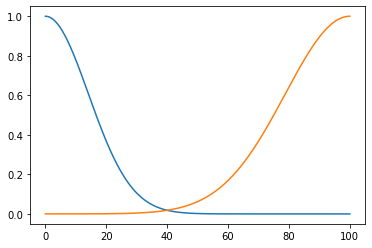

In [13]:
x = np.linspace(0, 100, num=500)
y1 = np.vectorize(new_very_young)(x)
y2 = np.vectorize(new_very_old)(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

## Questão 6

In [5]:
def trimf(x, a, b, c):
    y = np.empty(x.size)
    for i in range(x.size):
        y[i] = (max(min( 1.0*(x[i]-a)/(b-a), 1.0*(c-x[i])/(c-b)),0))
    
    return y

def trapmf(x, a, b, c, d):
    y = np.empty(x.size)
    for i in range(x.size):
        y[i] = (max(min( 1.0*(x[i]-a)/(b-a), 1, 1.0*(d-x[i])/(d-c) ), 0))
        
    return y

Máximo entre A1 e A': 0.4909819639278554
Máximo entre A2 e A': 0.6653306613226455


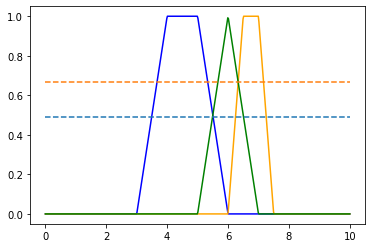

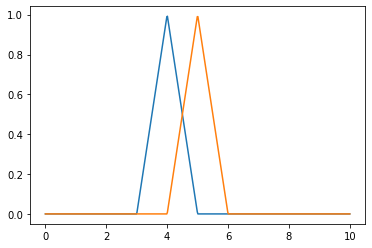

In [15]:
x = np.linspace(0, 10, num=500)

mu_a1 = trapmf(x, 3, 4, 5, 6)
mu_a2 = trapmf(x, 6, 6.5, 7, 7.5)
mu_aline = trimf(x, 5, 6, 7)
max_a1line = max(np.minimum(mu_a1, mu_aline))
max_a2line = max(np.minimum(mu_a2, mu_aline))
print(f"Máximo entre A1 e A': {max_a1line}")
print(f"Máximo entre A2 e A': {max_a2line}")
plt.plot(x, mu_a1, color='blue')
plt.plot(x, mu_a2, color='orange')
plt.plot(x, mu_aline, color='green')
plt.plot(x, np.ones(x.size)*max_a1line, ls='--')
plt.plot(x, np.ones(x.size)*max_a2line, ls='--')
plt.show()

mu_c1 = trimf(x, 3, 4, 5)
mu_c2 = trimf(x, 4, 5, 6)
plt.plot(x, mu_c1)
plt.plot(x, mu_c2)
plt.show()

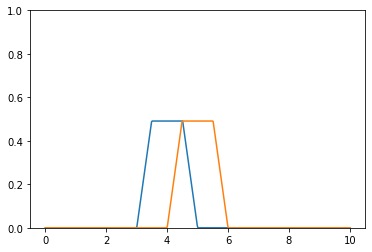

In [16]:
min_comp = min(max_a1line, max_a2line)
min_comp_array = np.ones(x.size)*min_comp

mu_c1 = trimf(x, 3, 4, 5)
mu_c2 = trimf(x, 4, 5, 6)
plt.plot(x, np.minimum(mu_c1, min_comp_array))
plt.plot(x, np.minimum(mu_c2, min_comp_array))
plt.ylim(0, 1)
plt.show()

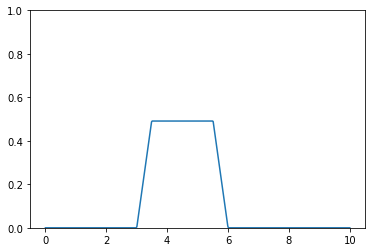

In [17]:
mu_cline = np.maximum(np.minimum(mu_c1, min_comp_array), np.minimum(mu_c2, min_comp_array))
plt.plot(x, mu_cline)
plt.ylim(0, 1)
plt.show()

# Atividade Prática 2

## Aproximação da função seno

Considerando as seguintes regras dentro do intervalo $\left[0, 2\pi\right]$: 

* Se x é pequeno, então $y = x$
* Se x é médio, então $y = -x+\pi$
* Se x é grande, então $y = x+2\pi$

In [1]:
def fuzzify(x, member):
    
    if (member == 'small'):
        c = 0
    elif (member == 'medium'):
        c = m.pi
    elif (member == 'big'):
        c = 2*m.pi
    
    if (type(x) == np.ndarray):
        y = []
        for value in x:
            y.append( m.exp( -1.0*(value-c)**2 / (2*(m.pi/2)**2) ) )
        return y
    else:
        return m.exp( -1.0*(x-c)**2 / (2*(m.pi/2)**2) )
    

In [2]:
def f(x, member):
    if (member == 'small'):
        return x
    elif (member == 'medium'):
        return -x+m.pi
    elif (member == 'big'):
        return x-2*m.pi

In [3]:
def takagi_sugeno(x, members):
    
    if (type(x) == np.ndarray):
        y = []
        for value in x:
            
            numerator = 0
            denominator = 0
            for member in members:
                numerator = numerator + fuzzify(value, member)*f(value, member)
                denominator = denominator + fuzzify(value, member)

            if (denominator == 0):
                denominator = 1
                
            y.append(numerator / denominator)
            
        return y
    else:
        numerator = 0
        denominator = 0
        for member in members:
            numerator = numerator + fuzzify(x, member)*f(x, member)
            denominator = denominator + fuzzify(x, member)

        if (denominator == 0):
            denominator = 1
        
        return numerator/denominator

In [4]:
x = np.linspace(0, 2*m.pi, num=500)
members = ['small', 'medium', 'big']

plt.plot(x, np.vectorize(m.sin)(x), color = 'black')
# plt.plot(x, fuzzify(x, members[0]), color='red')
# plt.plot(x, fuzzify(x, members[1]), color='blue')
# plt.plot(x, fuzzify(x, members[2]), color='orange')
plt.plot(x, takagi_sugeno(x, members), color = 'red')
# plt.plot(x, mu_small-2, color='blue')
# plt.plot(x, mu_medium-2, color='orange')
# plt.plot(x, mu_big-2, color='red')
# plt.ylim(-2, 1.25)
plt.show()

NameError: name 'np' is not defined